<a href="https://colab.research.google.com/github/sarahrdk/EscapeEarth/blob/main/Interns/Sarah/What_are_Periodogram_objects%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lightkurve

In [2]:
#getting KIC 10264202 from data archive
from lightkurve import search_lightcurvefile
lc = search_lightcurvefile('KIC 10264202', quarter=10).download().PDCSAP_FLUX.remove_nans()

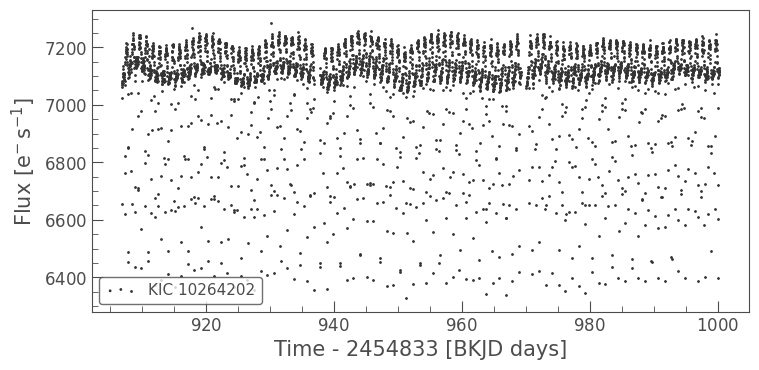

In [3]:
#plot
lc.scatter();

In [4]:
#periodogram class to find the rotation period
pg = lc.to_periodogram(oversample_factor=1)

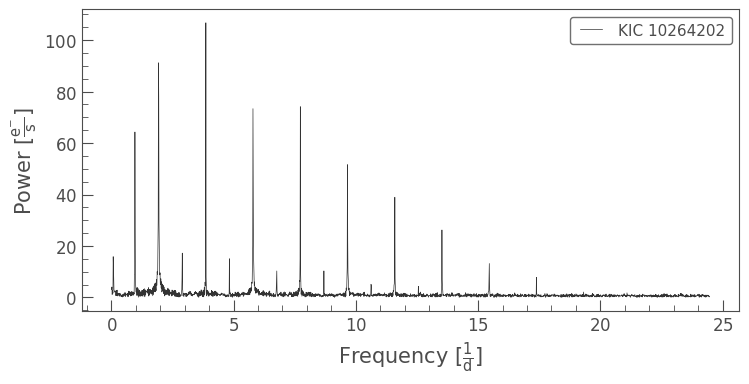

In [5]:
#plot the periodogram
pg.plot();

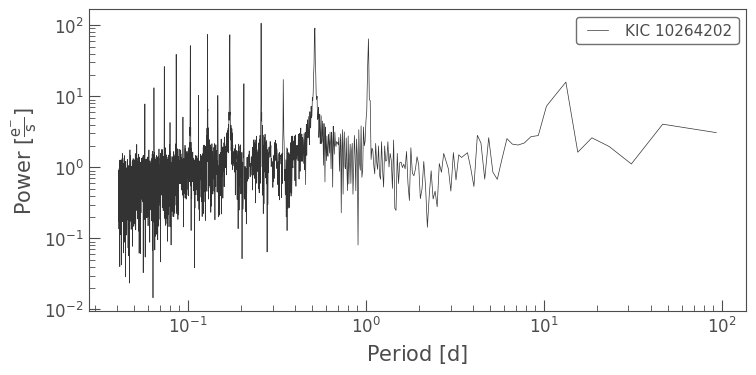

In [6]:
#plot it in period space, so that we can see what period the oscillation is occuring
pg.plot(view='period', scale='log');

In [7]:
#access the full period data 
pg.period

<Quantity [9.34019490e+01, 4.67009745e+01, 3.11339830e+01, ...,
           4.09119356e-02, 4.08940232e-02, 4.08761265e-02] d>

In [8]:
#access the full power data 
pg.power

<Quantity [3.08123446, 4.04910021, 1.11686323, ..., 0.38587616, 0.17210997,
           0.42668004] electron / s>

In [9]:
#highest peak in the periodogram
pg.period_at_max_power

<Quantity 0.25873116 d>

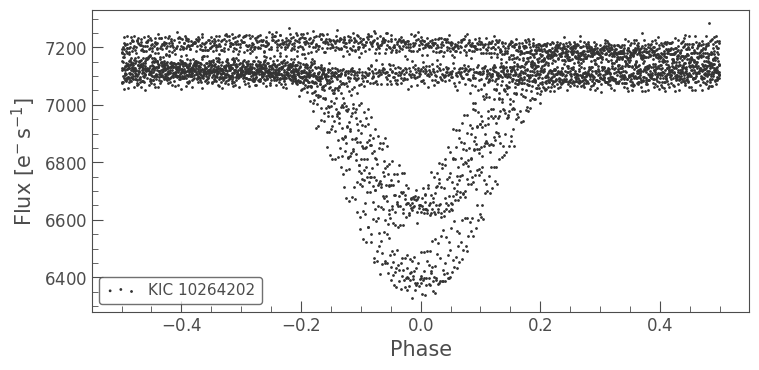

In [10]:
#fold our light curve
lc.fold(pg.period_at_max_power).scatter();

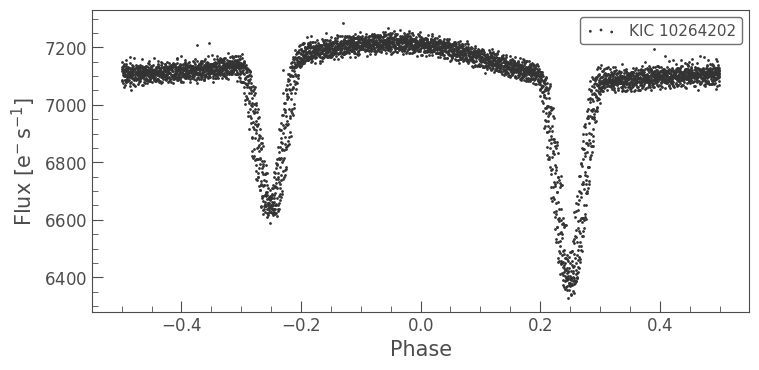

In [11]:
#plotting again w 4x the period
lc.fold(4 * pg.period_at_max_power).scatter();

In [12]:
#increasing the number of points in our periodogram using the oversample_factor parameter
#constraining the range of the period value
import astropy.units as u
pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
pg.period_at_max_power

<Quantity 1.03509717 d>

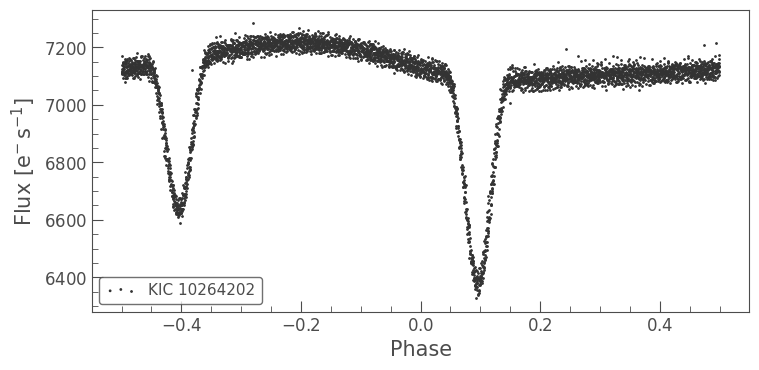

In [13]:
lc.fold(pg.period_at_max_power).scatter();